## Introducción

Este conjunto de datos contiene datos de campañas de marketing bancarias y podemos utilizarlo para optimizar las campañas de marketing y atraer a más clientes a la suscripción de depósitos a plazo. 

El análisis de los datos de marketing de la organización es una de las aplicaciones más comunes de la ciencia de datos y el aprendizaje automático. Este análisis se me hizo interesante y sin ninguna duda podemos aprovecharlo

En general, los conjuntos de datos que contienen datos de marketing pueden utilizarse para dos objetivos comerciales diferentes:

1.- Predicción de los resultados de la campaña de marketing para cada cliente y aclaración de los factores que afectan a dichos resultados. Esto nos ayudara a encontrar maneras de optimizar las campañas de marketing y en la toma de decisiones.

2.- Determinación de segmentos de clientes mediante datos de clientes que suscribieron un depósito a plazo. Esto ayuda a identificar el perfil del cliente con mayor probabilidad de adquirir el producto y a desarrollar campañas de marketing mas orientedas a un perfil de clientes en especifico.



## Enfoque

Para optimizar las campañas de marketing con la ayuda del conjunto de datos, debemos seguir los siguientes pasos:

Primero realizaremos un análisis inicial de alto nivel de nuestro conjunto de datos(Preprocesamiento): que conlleva examinar el número de filas, los valores faltantes y las columnas del conjunto de datos y sus valores en relación con el resultado de la campaña.
Depurar los datos: eliminar las columnas irrelevantes, gestionar los valores faltantes e incorrectos, y convertir las columnas categóricas en variables ficticias.

Por ultimo vamos a utilizar técnicas de aprendizaje automático para predecir el resultado de la campaña de marketing y determinar los factores que influyen en el exito de este.

## Datos del cliente bancario:
1 - Age: (numérico)

2 - job: tipo de trabajo (categórico: 'administrador', 'obrero', 'emprendedor', 'empleado doméstico', 'gerente', 'jubilado', 'autónomo', 'servicios', 'estudiante', 'técnico', 'desempleado', 'desconocido')

3 - marital: estado civil (categórico: 'divorciado', 'casado', 'soltero', 'desconocido'; nota: 'divorciado' significa divorciado o viudo)

4 - education: (categórico: primaria, secundaria, terciaria y desconocido)

5 - default: ¿tiene crédito en mora? (categórico: 'no', 'sí', 'desconocido')

6 - housing: ¿tiene préstamo hipotecario? (categórico: 'no', 'sí', 'desconocido')

7 - loan: ¿tiene préstamo personal? (categórico: 'no', 'sí', 'desconocido')

8 - balance: Saldo del individuo.


## Relacionado con el último contacto de la campaña actual:
8 - contact: tipo de comunicación del contacto (categórico: 'celular', 'teléfono')

9 - month: mes del último contacto del año (categórico: 'ene', 'feb', 'mar', ..., 'nov', 'dic')

10 - day: día de la semana del último contacto (categórico: 'lun', 'mar', 'mié', 'jue', 'vie')

11 - duration: duración del último contacto, en segundos (numérico). Nota importante: este atributo afecta considerablemente el objetivo de salida (p. ej., si duración = 0, entonces y = 'no'). Sin embargo, la duración no se conoce antes de que se realice una llamada. Además, después de la finalización de la llamada, y es obviamente conocido. Por lo tanto, esta entrada solo debe incluirse con fines de referencia y debe descartarse si se pretende obtener un modelo predictivo realista.

## Otros atributos:

12 - campaign: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)

13 - pdays: número de días transcurridos desde el último contacto con el cliente de una campaña anterior (numérico; 999 significa que el cliente no fue contactado previamente)

14 - previous: número de contactos realizados antes de esta campaña y para este cliente (numérico)

15 - poutcome: resultado de la campaña de marketing anterior (categórico: 'fracaso', 'inexistente', 'éxito')

Variable de salida (objetivo deseado):

y - ¿Ha suscrito el cliente un depósito a plazo? (binario: 'sí', 'no')

In [3]:
#importación de bibliotecas de álgebra lineal y manipulación de datos
import numpy as np
import pandas as pd

#importar visualización 
import matplotlib.pyplot as plt
import seaborn as sns

#importar machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import xgboost

from sklearn.model_selection import train_test_split #Dividir el conjunto de entrenamiento
from sklearn.metrics import accuracy_score #metrics

#herramientas para la búsqueda de hiperparámetros
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [4]:
df = pd.read_csv("C:/Users/Jesus Eduardo/Documents/Bank marketing/bank.csv")

In [6]:
#Echamos un promer vistazo a los datos 
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


Después de importar el conjunto de datos, tenemos que mirar el número total de filas en el conjunto de datos y analizar la cantidad de valores faltantes para poder hacer algo al respecto.

In [8]:
print("El conjunto de datos de marketing bancario consta de {rows} filas.".format(rows = len(df)))

El conjunto de datos de marketing bancario consta de 11162 filas.


In [10]:
#y el valor de datos faltantes sera:
missing_values = df.isnull().mean()*100

missing_values.sum()

0.0

Como podemos ver es un dataset sin valores faltantes 

Exploración de columnas
Se tienen columnas categóricas y numéricas. De las categoricas se tiene:

In [14]:
df_categoricas = df.select_dtypes(include=['object','category'])
df_categoricas

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes
...,...,...,...,...,...,...,...,...,...,...
11157,blue-collar,single,primary,no,yes,no,cellular,apr,unknown,no
11158,services,married,secondary,no,no,no,unknown,jun,unknown,no
11159,technician,single,secondary,no,no,no,cellular,aug,unknown,no
11160,technician,married,secondary,no,no,yes,cellular,may,failure,no


In [19]:
# 2. Usando df.dtypes
tipos_columnas = df.dtypes
print("\nTipos de columnas:\n", tipos_columnas)

# Filtrar para obtener solo los nombres de las columnas categóricas
nombres_columnas_categoricas = tipos_columnas[tipos_columnas.isin(['object', 'category'])].index.tolist()
print("\nNombres de columnas categóricas (usando df.dtypes):\n", nombres_columnas_categoricas)


Tipos de columnas:
 age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

Nombres de columnas categóricas (usando df.dtypes):
 []


## Nos interesan las de tipo Object

## Para col. categoricas se tiene:

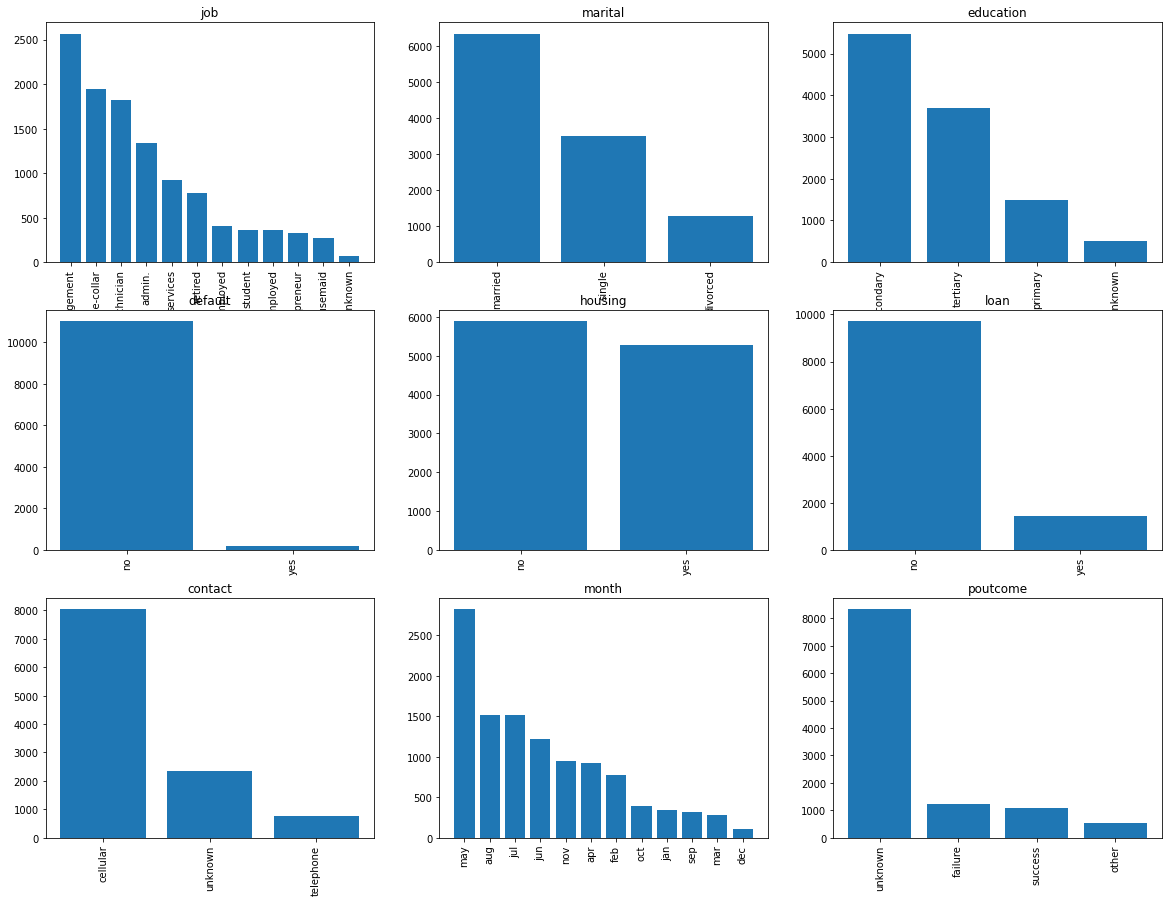

In [20]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

## Para las columnas numericas se tiene(histograma):

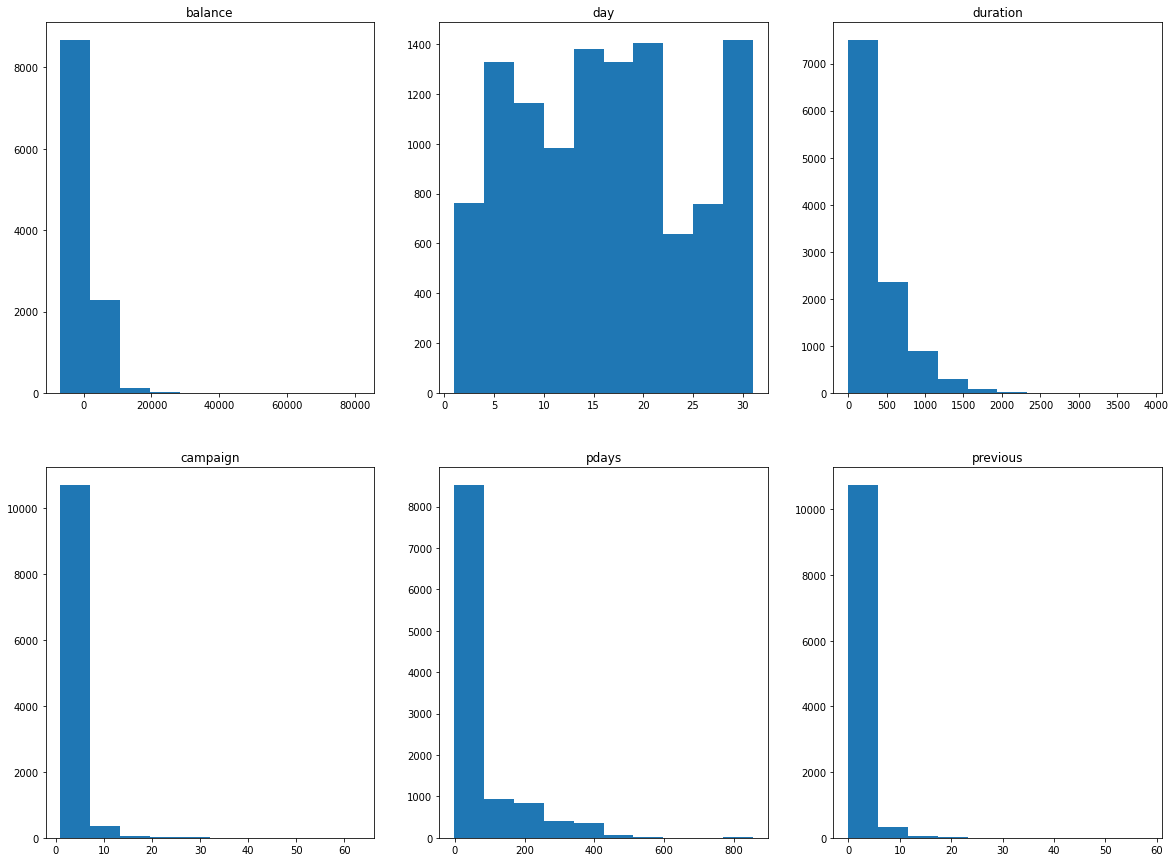

In [23]:
num_columns = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

Se observa que las columnas numéricas tienen valores atípicos ( "campaña", "pdays"  y "anterior"), ay que analizar los valores que causan ruido.

Analicemos con más detalle los valores de las columnas "campaña", "pdays" y "anterior":

In [24]:
df[['pdays', 'campaign', 'previous']].describe()

,pdays,campaign,previous
count,11162.000000,11162.000000,11162.000000
mean,51.330407,2.508421,0.832557
std,108.758282,2.722077,2.292007
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,20.750000,3.000000,1.000000
max,854.000000,63.000000,58.000000


## Centrandonos en pdays
"pdays" contiene el número de días transcurridos desde la última vez que se contactó al cliente en una campaña anterior. Al analizar los datos de "pdays", observemos que:

Porcentaje de valores 'pdays' superiores a 400:

In [26]:
len (df[df['pdays'] > 400] ) / len(df) * 100

1.2005017022039062

Solo el 1,2 % de los valores son menores a 400 dias. Posiblemente sean valores atípicos, por lo que deberíamos considerar imputar algo (posiblemente el valor medio) en lugar de estos valores.

-1 posiblemente significa que no se contactó al cliente antes o que faltan datos.

Como no se sabe qué significa exactamente -1 se sugiere omitir esta columna

"campaign" contiene el número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto). 

In [27]:
len (df[df['campaign'] > 34] ) / len(df) * 100

0.035835871707579285

Los valores de "campaign"  menores a 34 son claramente irrelevantes(Por el codigo anterior), representan solo el 0.036, por lo que se sugiere imputarlos con los valores promedio.



"previous" contiene el número de contactos realizados antes de esta campaña y para este cliente (numérico). 

Porcentaje de valores "previous" menores a 34:

In [28]:
len (df[df['previous'] > 34] ) / len(df) * 100

0.04479483963447411

Como podemos ver de igual manera se tiene para "previous"

## Análisis de la columna de respuesta(deposit).

Es muy importante examinar la columna de respuesta, que contiene la información que vamos a predecir. En nuestro caso, debemos examinar la columna "deposit" y comparar sus valores con los de otras columnas.

Pero antes observaremos el número de valores "sí" y "no" en la columna de respuesta "deposit".

<Axes: title={'center': 'Valor del depósito cuenta'}, xlabel='deposit'>

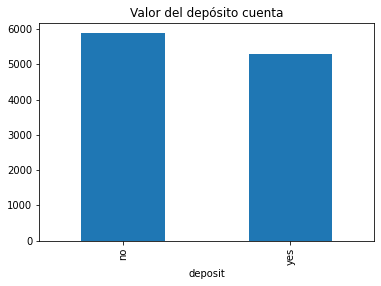

In [32]:
value_counts = df['deposit'].value_counts()

value_counts.plot.bar(title = 'Valor del depósito cuenta')

Del diagrama anterior vemos que los recuentos de los valores "sí" y "no" para "deposit" son similares, por lo que podemos usar la precisión como métrica para un modelo que predice el resultado de la campaña.

Ahora veamos lo que se habia dicho anterior mente, comparar deposit con otra columnas:

<Axes: title={'center': 'trabajo y depósito'}, xlabel='job'>

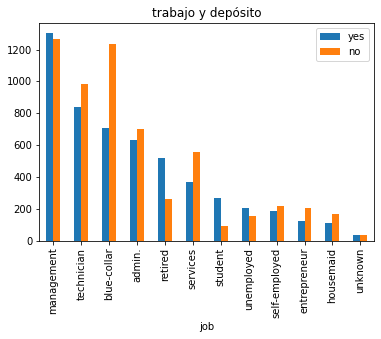

In [35]:
#trabajo y deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['job'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'trabajo y depósito')

<Axes: title={'center': 'Estado civil y depósito'}, xlabel='marital'>

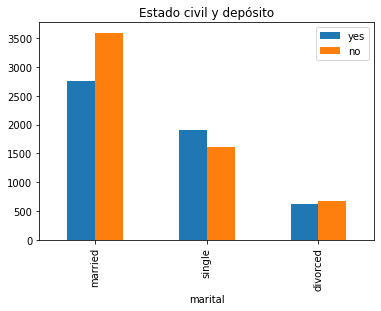

In [42]:
#estado civil y depósito
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['marital'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['marital'].value_counts()

j_df.plot.bar(title = 'Estado civil y depósito')

<Axes: title={'center': 'Educacion y deposit'}, xlabel='education'>

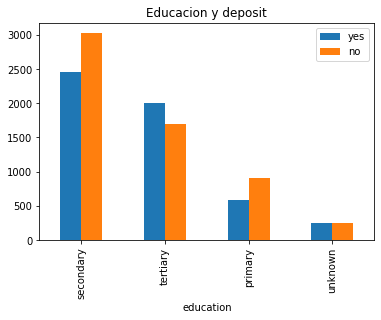

In [41]:
#educacion y deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['education'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['education'].value_counts()

j_df.plot.bar(title = 'Educacion y deposit')

<Axes: title={'center': 'Tipo de contacto y depósito'}, xlabel='contact'>

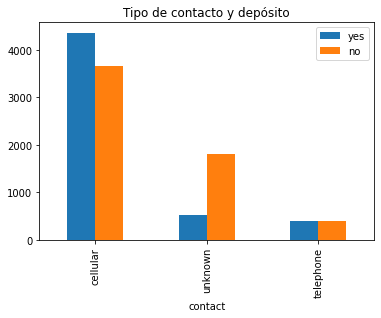

In [38]:
#Tipo de contacto y depósito 
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['contact'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['contact'].value_counts()

j_df.plot.bar(title = 'Tipo de contacto y depósito')

## De los diagramas anteriores se obtiene:

Los clientes con empleos manuales(Blue collar) y de servicios(services) tienen menos probabilidades de suscribirse a un depósito a plazo.

Los clientes casados tienen menos probabilidades de suscribirse a un depósito a plazo.

En educacion y deposito tenemos los de secundaria tienen menos probabilidades de suscribirse.

## Ahora veamos cómo las columnas numéricas afectan la suscripción a un depósito a plazo.

In [43]:
#balance y deposit

b_df = pd.DataFrame()
b_df['balance_yes'] = (df[df['deposit'] == 'yes'][['deposit','balance']].describe())['balance']
b_df['balance_no'] = (df[df['deposit'] == 'no'][['deposit','balance']].describe())['balance']

b_df

,balance_yes,balance_no
count,5289.000000,5873.000000
mean,1804.267915,1280.227141
std,3501.104777,2933.411934
min,-3058.000000,-6847.000000
25%,210.000000,64.000000
50%,733.000000,414.000000
75%,2159.000000,1324.000000
max,81204.000000,66653.000000


<Axes: title={'center': 'Estadísticas de saldos y depósitos'}>

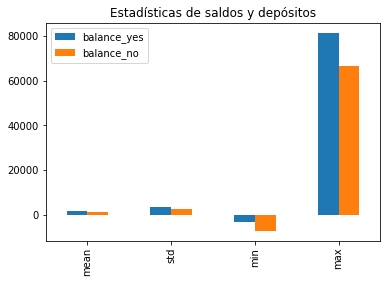

In [44]:
b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Estadísticas de saldos y depósitos')

In [97]:
#age and deposit

a_df = pd.DataFrame()
a_df['age_yes'] = (df[df['deposit'] == 'yes'][['deposit','age']].describe())['age']
a_df['age_no'] = (df[df['deposit'] == 'no'][['deposit','age']].describe())['age']
a_df

,age_yes,age_no
count,5289.000000,5873.000000
mean,41.670070,40.837391
std,13.497781,10.264815
min,18.000000,18.000000
25%,31.000000,33.000000
50%,38.000000,39.000000
75%,50.000000,48.000000
max,95.000000,89.000000


<Axes: title={'center': 'Estadísticas de edad y depósitos'}>

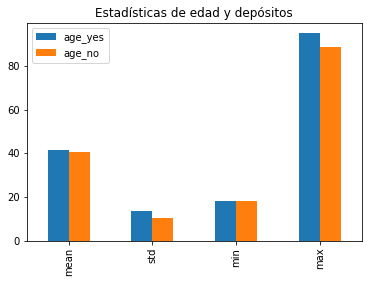

In [98]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Estadísticas de edad y depósitos')

In [99]:
#número de contactos realizados durante esta campaña ('campaign') y depósito
c_df = pd.DataFrame()
c_df['campaign_yes'] = (df[df['deposit'] == 'yes'][['deposit','campaign']].describe())['campaign']
c_df['campaign_no'] = (df[df['deposit'] == 'no'][['deposit','campaign']].describe())['campaign']

c_df

,campaign_yes,campaign_no
count,5289.000000,5873.000000
mean,2.141047,2.839264
std,1.921826,3.244474
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,32.000000,63.000000


<Axes: title={'center': 'Estadísticas de número de contactos realizados durante esta campaña y depósitos'}>

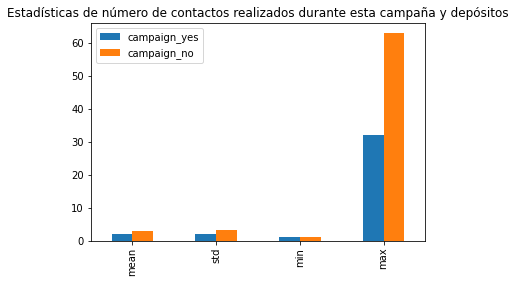

In [100]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Estadísticas de número de contactos realizados durante esta campaña y depósitos')

<Axes: title={'center': 'Estadistica de número de contactos realizados durante la campaña anterior Y Deposito'}>

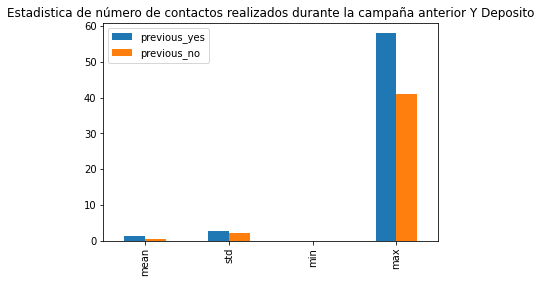

In [47]:
#número de contactos realizados durante la campaña anterior ('previous') Y Deposito
p_df = pd.DataFrame()
p_df['previous_yes'] = (df[df['deposit'] == 'yes'][['deposit','previous']].describe())['previous']
p_df['previous_no'] = (df[df['deposit'] == 'no'][['deposit','previous']].describe())['previous']

p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Estadistica de número de contactos realizados durante la campaña anterior Y Deposito')

De los diagramas anteriores se tiene que:

Las personas que contrataron un depósito a plazo fijo tienden a tener mayores valores de saldo y antigüedad.

Las personas que contrataron un depósito a plazo fijo tienden a tener menos contactos durante esta campaña.

In [ ]:
#age and deposit

a_df = pd.DataFrame()
a_df['age_yes'] = (df[df['deposit'] == 'yes'][['deposit','age']].describe())['age']
a_df['age_no'] = (df[df['deposit'] == 'no'][['deposit','age']].describe())['age']
a_df

## Limpieza de datos

Antes de aplicar técnicas de aprendizaje automático, debemos preparar el conjunto de datos para su procesamiento:

Convertir las columnas con valores "sí" y "no" en columnas booleanas(0=no y 1=si)

Convertir las columnas categóricas en variables ficticias.

In [48]:
def get_dummy_from_bool(row, column_name):
    ''' Devuelve 0 si el valor en column_name es no, devuelve 1 si el valor en column_name es sí'''
    return 1 if row[column_name] == 'yes' else 0

def get_correct_values(row, column_name, threshold, df):
    ''' Devuelve el valor medio si el valor en column_name está por encima del umbral'''
    if row[column_name] <= threshold:
        return row[column_name]
    else:
        mean = df[df[column_name] <= threshold][column_name].mean()
        return mean

def clean_data(df):
    '''
    ENTRADA
    df - Dataframe de Pandas que contiene el conjunto de datos de la campaña de marketing bancario

    SALIDA
    df - Conjunto de datos depurado:
    1. Las columnas con valores "sí" y "no" se convierten en variables booleanas(0=no y 1=0);
    2. Las columnas categóricas se convierten en variables ficticias;
    3. Se eliminan las columnas irrelevantes.
    4. Se imputan los valores incorrectos.
    '''
    
    cleaned_df = df.copy()
    
    #convierte columnas que contienen valores 'sí' y 'no' en variables booleanas y elimina las columnas originales
    bool_columns = ['default', 'housing', 'loan', 'deposit']
    for bool_col in bool_columns:
        cleaned_df[bool_col + '_bool'] = df.apply(lambda row: get_dummy_from_bool(row, bool_col),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = bool_columns)
    
    #convertir columnas categóricas en ficticias
    cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
    
    for col in  cat_columns:
        cleaned_df = pd.concat([cleaned_df.drop(col, axis=1),
                                pd.get_dummies(cleaned_df[col], prefix=col, prefix_sep='_',
                                               drop_first=True, dummy_na=False)], axis=1)
    
    #eliminar columnas irrelevantes
    cleaned_df = cleaned_df.drop(columns = ['pdays'])
    
    #Imputar valores incorrectos y eliminar columnas originales
    cleaned_df['campaign_cleaned'] = df.apply(lambda row: get_correct_values(row, 'campaign', 34, cleaned_df),axis=1)
    cleaned_df['previous_cleaned'] = df.apply(lambda row: get_correct_values(row, 'previous', 34, cleaned_df),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = ['campaign', 'previous'])
    
    return cleaned_df

In [51]:
#Observemos los datos limpios:
cleaned_df = clean_data(df)
cleaned_df.head(10)

,age,balance,day,duration,default_bool,housing_bool,loan_bool,deposit_bool,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,campaign_cleaned,previous_cleaned
0,59,2343,5,1042,0,1,0,1,False,False,...,False,True,False,False,False,False,False,True,1.0,0.0
1,56,45,5,1467,0,0,0,1,False,False,...,False,True,False,False,False,False,False,True,1.0,0.0
2,41,1270,5,1389,0,1,0,1,False,False,...,False,True,False,False,False,False,False,True,1.0,0.0
3,55,2476,5,579,0,1,0,1,False,False,...,False,True,False,False,False,False,False,True,1.0,0.0
4,54,184,5,673,0,0,0,1,False,False,...,False,True,False,False,False,False,False,True,2.0,0.0
5,42,0,5,562,0,1,1,1,False,False,...,False,True,False,False,False,False,False,True,2.0,0.0
6,56,830,6,1201,0,1,1,1,False,False,...,False,True,False,False,False,False,False,True,1.0,0.0
7,60,545,6,1030,0,1,0,1,False,False,...,False,True,False,False,False,False,False,True,1.0,0.0
8,37,1,6,608,0,1,0,1,False,False,...,False,True,False,False,False,False,False,True,1.0,0.0
9,28,5090,6,1297,0,1,0,1,False,False,...,False,True,False,False,False,False,False,True,3.0,0.0


## Machine learning para la predicción de resultados de campañas
## Modelo de clasificación para la predicción de resultados de campañas

Ahora, utilizaremos conjuntos de datos limpios para predecir resultados de campañas con la ayuda de modelos de clasificación de aprendizaje automático. Se utilizara XGBoost, una de las bibliotecas de aprendizaje automático más comunes para modelado.

Primero Creamos conjuntos de datos "X" e "Y"(Deposit bool) para entrenar el modelo y dividirlos en conjuntos de datos de entrenamiento y de prueba.

In [52]:
X = cleaned_df.drop(columns = 'deposit_bool')
y = cleaned_df[['deposit_bool']]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [65]:
#entrenando el modelo XGBoost
xgb = xgboost.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train.squeeze().values)

#Calcular e imprimir puntuaciones para el modelo para las 15 características principales
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)
y_pred_prob = xgb.predict_proba(X_test)
print('Puntuación de precisión XGB entrenado: %.3f: test: %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))

Puntuación de precisión XGB entrenado: 0.914: test: 0.850


In [60]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score

In [61]:
print(classification_report(y_test,y_test_preds))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1742
           1       0.83      0.87      0.85      1607

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349



In [63]:
result = confusion_matrix(y_test,y_test_preds)
print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[1446  296]
 [ 207 1400]]


In [64]:
result2 = accuracy_score(y_test,y_test_preds)
print("Accuracy:",result2)

Accuracy: 0.8498059122126008


Obtenniendo la importancia de las características del modelo entrenado:

In [75]:
 #Cross validate XGBOOST
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(xgb, X_train, y_train, cv=3)

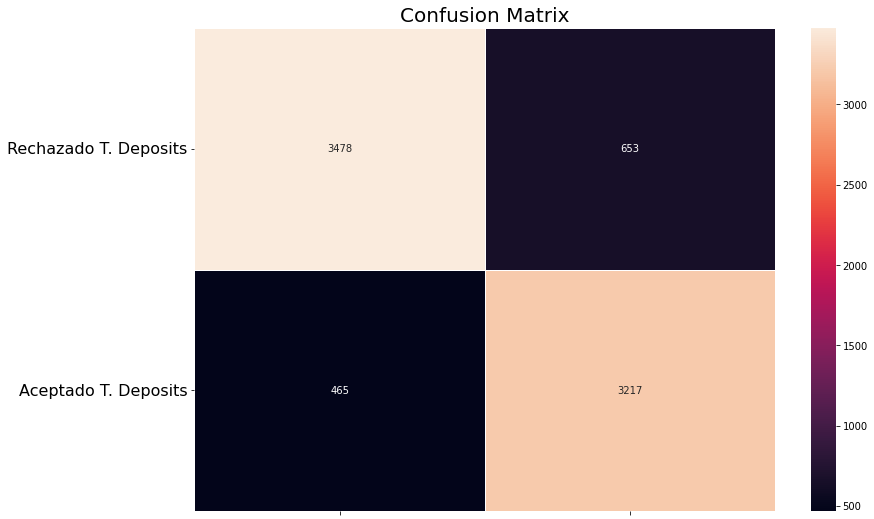

In [77]:
# 4697: no's, 4232: yes
conf_matrix = confusion_matrix(y_train, y_train_pred)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Rechazado T. Deposits', 'Aceptado T. Deposits'], fontsize=16, rotation=360)
plt.show()

Precisión y recuperación:

Recuperación: Es el número total de "Sí" en la columna de etiquetas del conjunto de datos. Por lo tanto, ¿cuántas etiquetas "Sí" detecta nuestro modelo?

Precisión: Significa qué tan segura es la predicción de nuestro modelo de que la etiqueta real es un "Sí".

Compensación de la precisión de recuperación:

A medida que aumenta la precisión, disminuye la recuperación y viceversa. Por ejemplo, si aumentamos la precisión del 30 % al 60 %, el modelo selecciona las predicciones que considera con un 60 % de certeza. Si hay un caso en el que el modelo cree que hay un 58 % de probabilidad de que un cliente potencial suscriba un depósito a plazo, lo clasificará como un "No". Sin embargo, ese caso fue en realidad un "Sí" (el cliente potencial sí suscribió un depósito a plazo). Por eso, cuanto mayor sea la precisión, mayor será la probabilidad de que el modelo pase por alto casos que realmente sean un "Sí".

In [78]:
# Encontremos las puntuaciones de precisión y recuperación.
from sklearn.metrics import precision_score, recall_score

print('Precision Score: ', precision_score(y_train, y_train_pred))

print('Recall Score: ', recall_score(y_train, y_train_pred))

Precision Score:  0.831266149870801
Recall Score:  0.8737099402498643


In [84]:
from sklearn.metrics import f1_score

In [86]:
y_pred_proba = xgb.predict_proba(X_test)[:, 1]

## ROC AUC Score

In [94]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

ROC AUC Score: 0.9247


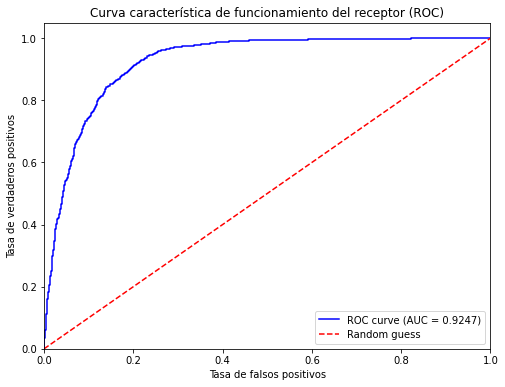

In [96]:
from sklearn.metrics import roc_curve, auc

# Calcular la tasa de falsos positivos, la tasa de verdaderos positivos y los umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva característica de funcionamiento del receptor (ROC)')
plt.legend(loc="lower right")
plt.show()

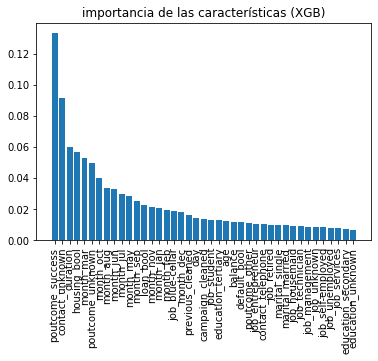

In [58]:
headers = ["name", "score"]
values = sorted(zip(X_train.columns, xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot importancia de las características
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('importancia de las características (XGB)')

plt.show()

Como podemos ver en el diagrama que muestra la importancia de las características, las más importantes son:

Saldo de la cuenta del cliente,
Edad del cliente,
Número de contactos realizados durante esta campaña y duración del contacto,
Número de contactos realizados antes de esta campaña.
Por lo tanto, los principales resultados del modelo son:

Los clientes de mayor edad tienen mayor probabilidad de suscribirse al depósito a plazo.
Los clientes con mayor saldo de cuenta tienen mayor probabilidad de suscribirse al depósito a plazo.
El número de contactos con los clientes es fundamental. Demasiados contactos con el cliente podrían hacer que rechace la oferta.

Hacieendo recomendaciones más específicas:

Averigüe el saldo de su cuenta. ¿En qué campaña de marketing debería centrarse?

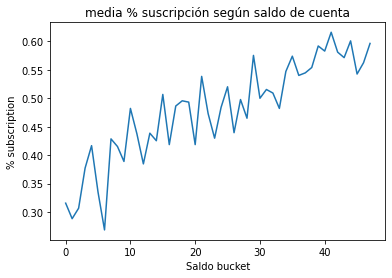

In [111]:
df_new = cleaned_df.copy()

#Introduzca la nueva columna 'balance_buckets' en ''
df_new['balance_buckets'] = pd.qcut(df_new['balance'], 50, labels=False, duplicates = 'drop')

#Agrupe por 'balance_buckets' y calcule el resultado promedio de la campaña por cada segmento de saldo.
mean_deposit = df_new.groupby(['balance_buckets'])['deposit_bool'].mean()

#plot
plt.plot(mean_deposit.index, mean_deposit.values)
plt.title('media % suscripción según saldo de cuenta')
plt.xlabel('Saldo bucket')
plt.ylabel('% subscription')
plt.show()

In [102]:
df_new[df_new['balance_buckets'] == 34]['balance'].min()

1490

Del diagrama anterior, podemos concluir que las campañas de marketing deberían centrarse en los clientes con un saldo de cuenta superior a $1490 .

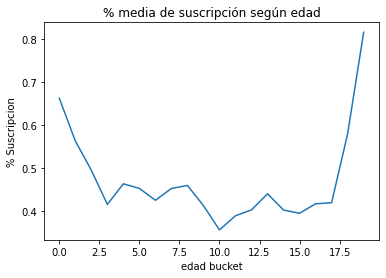

In [110]:
#Introduzca la nueva columna 'age_buckets' en ''
df_new['age_buckets'] = pd.qcut(df_new['age'], 20, labels=False, duplicates = 'drop')

#Agrupe por 'balance_buckets' y calcule el resultado promedio de la campaña por cada segmento de saldo.
mean_age = df_new.groupby(['age_buckets'])['deposit_bool'].mean()

#plot
plt.plot(mean_age.index, mean_age.values)
plt.title('% media de suscripción según edad')
plt.xlabel('edad bucket')
plt.ylabel('% Suscripcion')
plt.show()

In [105]:
df_new[df_new['age_buckets'] == 3]['age'].max()

31

In [106]:
df_new[df_new['age_buckets'] == 17]['age'].min()

56

Se observa que la tasa de suscripción promedio tiende a ser mayor para los clientes entre  31 años y 56.

Ahora determinaremos el número adecuado de contactos con el cliente durante la campaña:

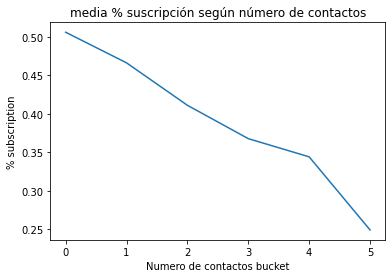

In [112]:
#introduce new column 'age_buckets' to  ''
df_new['campaign_buckets'] = pd.qcut(df_new['campaign_cleaned'], 20, labels=False, duplicates = 'drop')

#group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_campaign = df_new.groupby(['campaign_buckets'])['deposit_bool'].mean()

#plot average campaign outcome per bucket 
plt.plot(mean_campaign.index, mean_campaign.values)
plt.title('media % suscripción según número de contactos')
plt.xlabel('Numero de contactos bucket')
plt.ylabel('% subscription')
plt.show()

In [113]:
df_new[df_new['campaign_buckets'] == 2]['campaign_cleaned'].min()

4.0

Del gráfico anterior vemos que la tasa de suscripción promedio es inferior al 50% si el número de contactos durante la campaña supera los 4.


## Meses de actividad de marketing💸 segun lo visto:

Observamos que mayo fue el mes con mayor actividad de marketing. Sin embargo, este no fue el mejor mes, el modelo predice marzo como el mes mas alto, y es interesante ya que, marzo esta penultimo . Para la próxima campaña de marketing, sería prudente que el banco centrara sus esfuerzos en marzo, octubre, agosto y junio(Marzo debería considerarse, ya que fue el penultimo mes con menor actividad de marketing)

## Estacionalidad:

La predicciones dicen que los clientes potenciales optaron por suscribir depósitos a plazo durante primavera verano. La próxima campaña de marketing debería centrarse en estas temporadas.

## Llamadas de campaña:

Se debería implementar una política que establezca que no se deben realizar más de tres(En concreto menos de 4) llamadas a un mismo cliente potencial para ahorrar tiempo y esfuerzo en la captación de nuevos clientes. 

## Categoría de edad:

La edad del cliente también influye en el resultado de la campaña. Las futuras campañas deberían centrarse en clientes de entre 30 y 50 años.

## Ocupación:

No es sorprendente que los clientes potenciales estudiantes o jubilados fueran los más propensos a suscribir un depósito a plazo. Los jubilados tienden a tener más depósitos a plazo para obtener ingresos mediante el pago de intereses. Las personas jubiladas tienden a no gastar grandes cantidades de dinero, por lo que es más probable que lo inviertan prestándolo a la institución financiera. 

Los clientes con empleos manuales(Blue collar) y de servicios(services) tienen menos probabilidades de suscribirse a un depósito a plazo. Aunque no es mucho, ay que tomarlo en cuenta tambien.

## Préstamos y Saldos para Vivienda:

Los clientes potenciales con saldo bajo o nulo tenían mayor probabilidad de tener un préstamo para vivienda que las personas con saldo promedio o alto. ¿Qué significa tener un préstamo para vivienda? Esto significa que el cliente potencial tiene dificultades financieras para pagar su préstamo y, por lo tanto, no dispone de efectivo para suscribir una cuenta de depósito a plazo. Sin embargo, observamos que los clientes potenciales con saldo promedio o alto tienen menor probabilidad de tener un préstamo para vivienda y, por lo tanto, mayor probabilidad de abrir un depósito a plazo. Por último, la próxima campaña de marketing debería centrarse en las personas con saldo promedio o alto para aumentar la probabilidad de suscribir un depósito a plazo.
